In [14]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

#Data Preprocessing Cell

**Data Preprocessing**

In this step, we load the dataset, select relevant features, and prepare the data for training. We scale the features using StandardScaler to normalize their range, which helps the neural network learn more efficiently.



In [7]:
df = pd.read_csv('/Social_Network_Ads.csv')
df = df[['Age', 'EstimatedSalary', 'Purchased']]
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#Data Visualization Cell
**Data Visualization**

This section provides a visual overview of the dataset, helping us understand the distribution of features and the relationship between Age, Estimated Salary, and Purchase behavior. Visualizing data can reveal patterns and insights that improve model design.



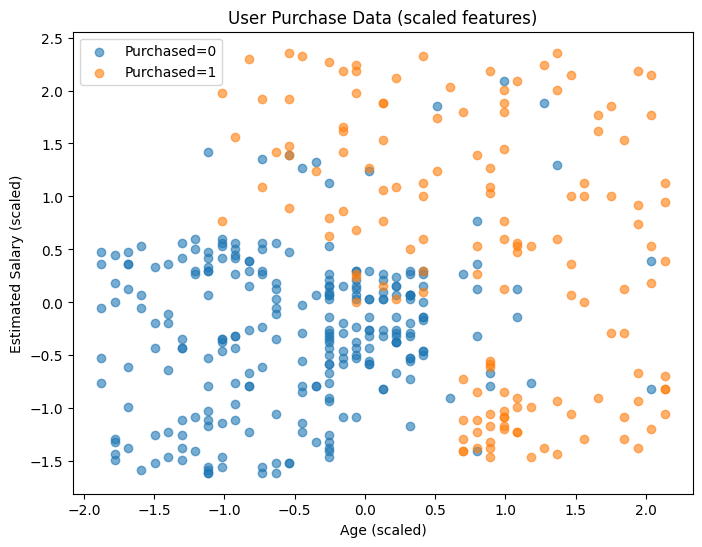

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
scaled_df = pd.DataFrame(X_scaled, columns=['Age_scaled', 'EstimatedSalary_scaled'])
scaled_df['Purchased'] = y.values

plt.figure(figsize=(8,6))
for purchased in [0, 1]:
    subset = scaled_df[scaled_df['Purchased'] == purchased]
    plt.scatter(subset['Age_scaled'], subset['EstimatedSalary_scaled'],
                label=f'Purchased={purchased}', alpha=0.6)

plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.title('User Purchase Data (scaled features)')
plt.legend()
plt.show()


#Neural Network Training Cell
**Neural Network Training**

Here, we define a simple multilayer perceptron (MLP) model, compile it with an optimizer and loss function, and train it on the preprocessed data. The training progress shows how the model improves over epochs.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model(input_dim=2):
    model = Sequential([
        Dense(16, activation='relu', input_shape=(input_dim,)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def compile_model(model):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

def train_model(model, X_train, y_train, epochs=50, batch_size=8, val_split=0.2):
    history = model.fit(X_train, y_train,
                        validation_split=val_split,
                        epochs=epochs,
                        batch_size=batch_size)
    return history


In [10]:
model = build_model()
compile_model(model)
history = train_model(model, X_train, y_train)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4726 - loss: 0.7019 - val_accuracy: 0.7500 - val_loss: 0.6654
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7713 - loss: 0.6549 - val_accuracy: 0.8750 - val_loss: 0.6217
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8575 - loss: 0.5873 - val_accuracy: 0.8750 - val_loss: 0.5770
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8571 - loss: 0.5552 - val_accuracy: 0.8906 - val_loss: 0.5367
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8567 - loss: 0.5136 - val_accuracy: 0.8750 - val_loss: 0.5006
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8569 - loss: 0.4960 - val_accuracy: 0.8594 - val_loss: 0.4670
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9051 - loss: 0.4233 - val_accuracy: 0.8750 - val_loss: 0.4354
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8687 - loss: 0.4233 - val_accuracy: 0.8750 - val_loss

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9414 - loss: 0.1820 
Test Accuracy: 93.75%


#User Input and Prediction

This part allows interactive input of features (Age and Estimated Salary). The input data is scaled the same way as the training data, then fed to the trained neural network to predict whether a user will purchase or not.



In [21]:
def predict_purchase_interactive(scaler, model):
    try:
        age = float(input("Enter Age: "))
        estimated_salary = float(input("Enter Estimated Salary: "))
    except ValueError:
        print("Please enter valid numbers!")
        return
    if age < 18 or age > 80 or estimated_salary < 1000:
        print("Input seems unrealistic. Try again with valid values.")
        return

    user_input = np.array([[age, estimated_salary]])
    user_input_scaled = scaler.transform(user_input)
    prob = model.predict(user_input_scaled)[0][0]  # extract float value

    percentage = prob * 100  # convert to %
    print(f"\nConfidence: {percentage:.2f}%")

    if prob > 0.5:
        print("Prediction:  User is likely to purchase.")
    else:
        print("Prediction:  User is unlikely to purchase.")

In [23]:
predict_purchase_interactive(scaler, model)

Enter Age: 34
Enter Estimated Salary: 29000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

Confidence: 0.61%
Prediction:  User is unlikely to purchase.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
